In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [24]:
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [26]:
df.fillna(0, inplace=True)

In [27]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [28]:
df.columns.to_list()

['engine_displacement',
 'num_cylinders',
 'horsepower',
 'vehicle_weight',
 'acceleration',
 'model_year',
 'origin',
 'fuel_type',
 'drivetrain',
 'num_doors',
 'fuel_efficiency_mpg']

In [29]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [30]:
df_train.shape, df_val.shape, df_test.shape

((5822, 11), (1941, 11), (1941, 11))

In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [32]:
y_train = df_train["fuel_efficiency_mpg"]
y_val = df_val["fuel_efficiency_mpg"]
y_test = df_test["fuel_efficiency_mpg"]

In [33]:
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [39]:
train_dict = df_train.to_dict(orient="records")

In [40]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)


In [42]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [48]:
print(export_text(dt,feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [52]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)
y_pred = rf.predict(X_val)

In [56]:
rf.score(X_val, y_val)

0.9685416016780671

In [57]:
root_mean_squared_error(y_val, y_pred)

0.4599777557336148

In [62]:
estimators_vs_rmse = {}
for n_estimators in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = round(root_mean_squared_error(y_val,y_pred),3)
    estimators_vs_rmse[n_estimators] = rmse
    print(rmse)

0.46
0.454
0.451
0.448
0.446
0.445
0.445
0.445
0.445
0.444
0.443
0.444
0.443
0.443
0.443
0.443
0.443
0.442
0.443
0.443


In [63]:
import matplotlib.pyplot as plt

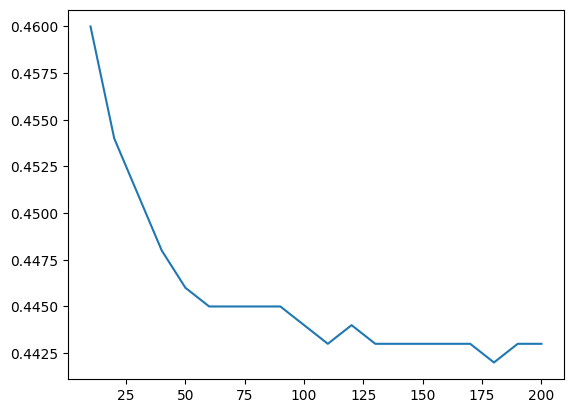

In [68]:
plt.plot(estimators_vs_rmse.keys(), estimators_vs_rmse.values())

In [84]:
data = []
for max_depth in [10, 15, 20, 25]:
    for n_estimators in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val,y_pred)
        data.append({"max_depth": max_depth , "n_estimators" : n_estimators, "rmse" : rmse})
        print(rmse) 

0.45189498205368783
0.44871930280196803
0.4462248243410706
0.4438769469346298
0.4426823297364458
0.44234995527764454
0.44179313949076043
0.44195965762740047
0.44196681006003036
0.44177674543409867
0.4408469921594633
0.44096669954703027
0.4408325522436666
0.44051153204813076
0.440127581955975
0.43999675953472894
0.4401374684770232
0.4398370341427043
0.43998229381987186
0.43994243973670616
0.45715957363045534
0.4524623657720535
0.45047796075848473
0.4476193814864658
0.44574346118913943
0.4450246901608095
0.44432328782630587
0.44420982877543924
0.4440481342127201
0.4436548702710823
0.4428035995434638
0.44315655436432455
0.44298721903078375
0.44284754444099506
0.4425893211344158
0.44234470359439854
0.4426230381163567
0.4422762601773512
0.4424222309390756
0.44242595860336614
0.4591089597813361
0.4533679984650699
0.45076768495364566
0.44793259061262436
0.4461354351922954
0.44497104671003196
0.44440120914247694
0.4447107703049537
0.444814082023239
0.4445911891198636
0.44359437994603185
0.4439

In [85]:
data = pd.DataFrame(data)

In [86]:
data.head()

,max_depth,n_estimators,rmse
0,10,10,0.451895
1,10,20,0.448719
2,10,30,0.446225
3,10,40,0.443877
4,10,50,0.442682


In [87]:
data.groupby("max_depth")["rmse"].mean()

max_depth
10    0.442321
15    0.445060
20    0.445644
25    0.445661
Name: rmse, dtype: float64

In [88]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val,y_pred)

In [99]:
for feature, importance  in zip(dv.get_feature_names_out(),rf.feature_importances_):
    print(feature, round(importance,3))

acceleration 0.011
drivetrain=All-wheel drive 0.0
drivetrain=Front-wheel drive 0.0
engine_displacement 0.003
fuel_type=Diesel 0.0
fuel_type=Gasoline 0.0
horsepower 0.016
model_year 0.003
num_cylinders 0.002
num_doors 0.002
origin=Asia 0.0
origin=Europe 0.001
origin=USA 0.001
vehicle_weight 0.959


In [100]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 36.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 35.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [102]:
import xgboost as xgb

In [103]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [121]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [122]:
model = xgb.train(params=xgb_params, dtrain=dtrain)
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

0.44563950318601825

In [123]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [124]:
model = xgb.train(params=xgb_params, dtrain=dtrain)
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

1.0200885118810736